# Анализ гипотез для увеличения выручки интернет магазина 

Для увеличения выручки бизнеса и, как следствие, его прибыли необходимо не только понимание своего продукта и работы бизнес схемы(плана), но и умение среди всех бизнес метрик распознавать важнейшие, определять точки роста и генерировать новые идеи. Чтобы компания зарабатывала больше денег топ-менеджменту стоит изучать базовые бизнес метрики: себестоимость продукта, валовая, операционная и чистая прибыль, а также смотреть на маржинальность бизнеса и возврат на инвестиции. Рассматривая данные показать менеджеры могут понять в какую сторону им двигаться для получения наибольшей прибыли и снижения затрат на себестоимость.

## Введение

В настоящей работе представлены основные данные интернет-магазина с помощью которых будет рассмотрен ряд гипотез, анализ бизнес-метрик и статистическое исследование по результатам которого будет принято решение о дальнейшей судьбе A/B-тестирования. 

Работа будет разделена на `три этапа`:

*`Этап №1`* - приоритезация гипотез

Цели и задачи: 
1. Анализ датафрейма `/datasets/hypothesis.csv`
2. Применение фреймворка ICE для приоритезации гипотез;
3. Применение фреймворка RICE для приоритезации гипотез и анализ приоритизации гипотез при применении RICE вместо ICE.

*`Этап №2`* - анализ A/B-тестирования

Цели и задачи:
1. Анализ и обработка датафрейма `/datasets/orders.csv` и  `/datasets/visitors.csv`;
2. Проверка стабильности кумулятивных метрик;
3. Анализ выбросов и всплесков в представленных данных;
4. Анализ статистически значимых различий по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
5. Построение графиков для визуализации полученных результатов. 
6. Принятие решения по A/B-тесту. 

*`Этап №3`* - общий вывод

Общий вывод в рамках которого будут подведены все итоги 

## Приоритезация гипотез

### Анализ датафрейма

Для анализа всех данных, импортируем необходимые нам библиотеки

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
from scipy import stats as st
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go
pd.set_option('display.max_colwidth', False)

Загрузим файл с данными и проанализируем его

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


На входе нам дано 5 основных столбцов c 9 строками: 
1. `Hypothesis` - гипотезы, направленные на увеличение выручки;
2. `Reach` - охват, выражен в числовом формате от 1 до 10;
3. `Impact` - влияние, выражено в числовом формате от 1 до 10;
4. `Confidence` - уверенность, выражена в числовом формате от 1 до 9;
5. `Efforts` - усилия, выражены в числовом формате от 1 до 10.


### Применение фреймворка ICE для приоритезации гипотез

Изучим файл с гипотезами и оценками параметров ICE

In [4]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis['ICE'] = (hypothesis['ICE'].round(2))
hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Полученный результат свидетельствует о том, что наиболее перспективными гипотезами являются 8, 0, 7. 

### Применение фреймворка RICE для приоритезации гипотез

Изучим файл с гипотезами и оценками параметров RICE

In [5]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее перспективной гипотезой является 7, далее с значительным отставанием идет 2 и затем 0 и 6 с одинаковыми показателями RICE.

**Анализ приоритизации гипотез при применении RICE вместо ICE**

Для проведения анализа по применению `RICE` вместо `ICE` отсортируем все значения по `RICE`

In [6]:
hypothesis.sort_values(by='RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


**Вывод:** 
1. Наиболее перспективной гипотезой согласно методу `RICE` является `7`. Она имеет наибольший `охват` - `10`, а также занимает третью позицию при приоритезации гипотез согласно методу `ICE`. 
2. Вторую позицую занимает гипотеза `2`. Она имеет большой `охват` - `8` и при этом наименьший показатель `трудозатрат` среди первой тройки - `3`. 
3. Третью позицию занимает гипотеза `0`, которая имеет наибольший показатель `вовлеченности` - `10` и при этом наибольший из тройки лидеров показатель трудозатрат - `6`. Стоит обратить внимание, что данная гипотеза занимает второе место по приоритезации гипотез согласно методу `ICE`. 



##  Анализ A/B-тестирования интернет-магазина

На данном этапе исследования мы проведем анализ A/B-теста по внедрению новых форм подписок на все основные страницы, чтобы собрать базу новых клиентов для email-рассылки. Тестирование длилось с 1 августа 2019 по 31 августа 2019 года.

В рамках тестирования группа А наблюдала сайт без внедрения форм подписок на все основные страницы, в то время, как группа B наблюдала сайт после изменений.

### Анализ и обработка датафрейма `/datasets/orders.csv` и  `/datasets/visitors.csv`

Импортируем датафреймы

In [7]:
orders = pd.read_csv('/datasets/orders.csv', sep=',')
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')

Построим функцию для рассмотрения основных данных датафреймов

**`orders`**

In [8]:
def inspect(df):
    display(df.head()) 
    df.info() 
    print ('Количество дубликатов -', df.duplicated().sum()) 
    numeric_columns=df.describe().columns 
    display(df.describe())
    display()
    df.columns = [x.lower().replace(' ', '_') for x in df.columns.values]
df = inspect(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
Количество дубликатов - 0


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


Проверим данные на неявные дубликаты

In [9]:
print('Количество неявных дубликатов -', orders.duplicated(subset=['transactionid', 'visitorid', 'group']).value_counts())


Количество неявных дубликатов - False    1197
dtype: int64


In [10]:
#Преобразуем столбец с временем
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [11]:
#Проверим наличии пользователей одновременно находящихся в группе A и B

visitorsAB = np.intersect1d(orders[orders['group']=='A']['visitorid'].unique(),
                           orders[orders['group']=='B']['visitorid'].unique())
orders1=orders.query('visitorid not in @visitorsAB')
orders1

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


Таким образом, более 10% данных дублируются, при их удалении это может повлиять на конверсию, поэтому принято решение не удалять пользователей одновременно находящихся в группе A и B

**Полученная информация говорит о следующем:**
1. На входе представлено 5 столбцов с 1197 записями:
- `trasactionid` - идентификатор транзакции;
- `visitorsid` - идентификатор пользователя;
- `date` - дата, когда был совершён заказ;
- `revenue` - стоимость транзакции; 
- `group` - группа A/B-теста, в которую попал заказ. 
2. В данных отсутствуют пропуски и дубликаты. 
3. Осуществлена предобработка столбца со временем. 

**`visitors`**

In [12]:
df=inspect(visitors)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
Количество дубликатов - 0


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [13]:
#Преобразуем столбец со временем
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

**Полученная информация говорит о следующем:**
1. На входе дано 3 столбца с 62 записями:
- `date` - дата;
- `group` - группа A/B-теста, в которую попал заказ
- `visitors` - количество пользователей в указанную дату в указанной группе A/B-теста.
2. В данных отсутствуют пропуски и дубликаты, а также осуществлена предобработка столбца со временем;
3. Имеется 2 группы `A` и `B` с равным количеством участников - `31 участник`.

### Проверка стабильности кумулятивных метрик

#### Построение графика кумулятивной выручки по группам

In [14]:
# Создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
   lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionid' : pd.Series.nunique,
'visitorid' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина  
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])
                      ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis = 1).sort_values(by=['date', 'group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


**Построим график кумулятивной выручки по группам**

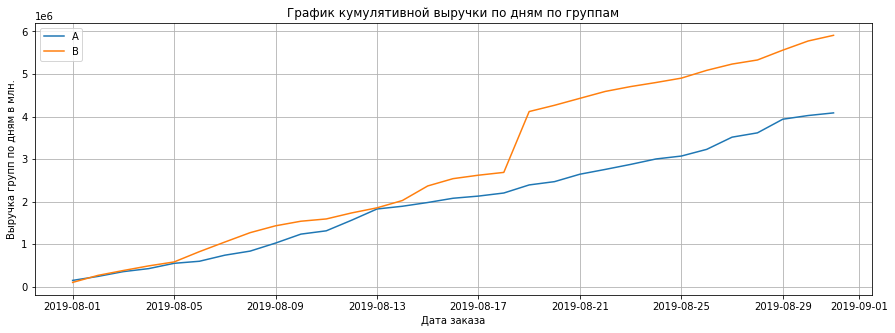

In [15]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date', 'revenue', 'orders']]
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date', 'revenue', 'orders']]
plt.figure(figsize=(15,5))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
# Строим график выручки группы А
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по дням по группам')
plt.xlabel('Дата заказа')
plt.ylabel('Выручка групп по дням в млн.')
plt.grid()
plt.legend()
plt.show()

**Выводы:**
Выручка группы B лидирует на протяжении всего тестирования. 13 августа выручка была практически одинаковой после чего группа B значительно стала лидировать, скорее всего это связано с наличием выбросов в группе.

### Построение графика кумулятивного среднего чека по группам.

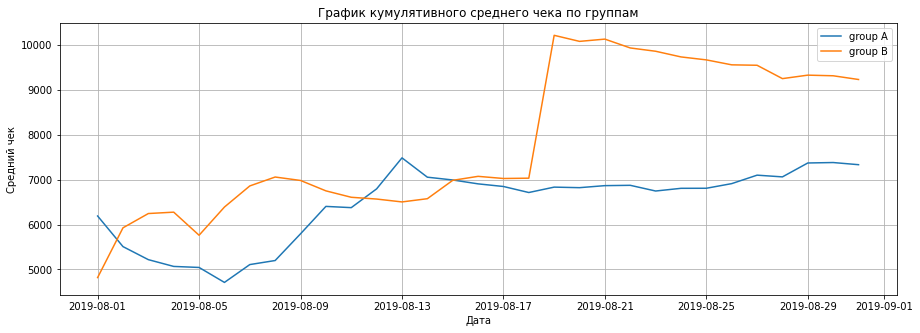

In [16]:
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='group A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='group B')
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.grid()
plt.legend()
plt.show()


**Выводы:**  
Практически на протяжении всего времени A/B-теста средний чек у группы B больше чем у группы А, исключением является отрезок времени с 11 по 15 августа, где средний чек у группы А больше. 

Стоит отметить, что после 17 августа у группы B наблюдается резкий рост среднего чека с 7000 рублей в день до более чем 10 000 рублей, после чего средний чек на протяжении оставшегося период времени плавно падает. У группы A наибольший показатель среднего чека зафиксирован 13 августа - ориентировочно 7500. после чего на протяжении оставшегося времени средний чек оставался стабильным в районе 6800 - 7400 рублей.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A

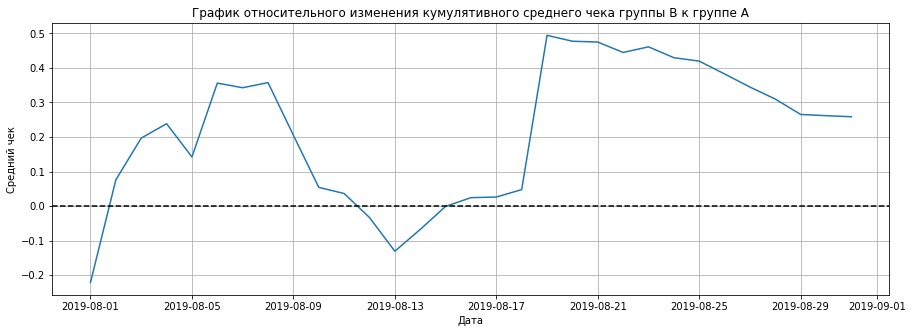

In [17]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15, 5))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.grid()
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

**Вывод:** 

На данном графике четко видно, что в данных имеются аномальные значения. Результаты теста резко менялись в несколько дат это связано с наличием аномальных значений. 

### Построим график кумулятивного среднего количества заказов на посетителя по группам

Перед тем как построить график - определим начальную и конечную дату анализа. 

In [18]:
print('Дата начала тестирования:', cumulativeData['date'].min()) 
print('Дата окончания тестирования:', cumulativeData['date'].max())

Дата начала тестирования: 2019-08-01 00:00:00
Дата окончания тестирования: 2019-08-31 00:00:00


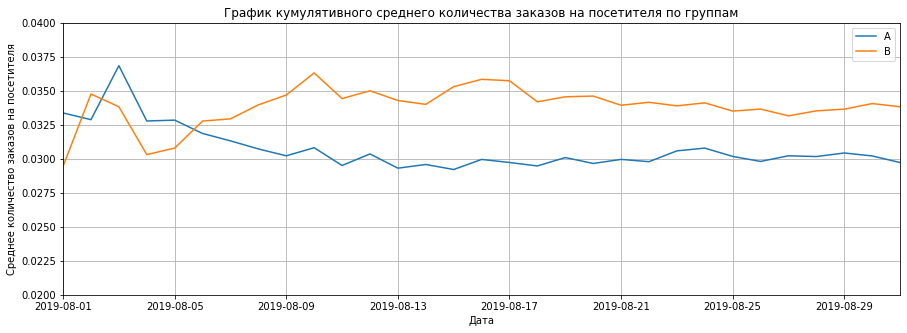

In [19]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе A
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим график
plt.figure(figsize=(15, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataA['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов на посетителя')
plt.grid()
plt.legend()
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0.020, 0.040])
plt.show()

**Выводы:**

В начале тестирования среднее количество заказов преобладало у группы А, однако с 6 августа ситуация резко изменилась и среднее количество заказов на посетителя стало больше у группы B, в то время как у группы А показатель пошел на спад.

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

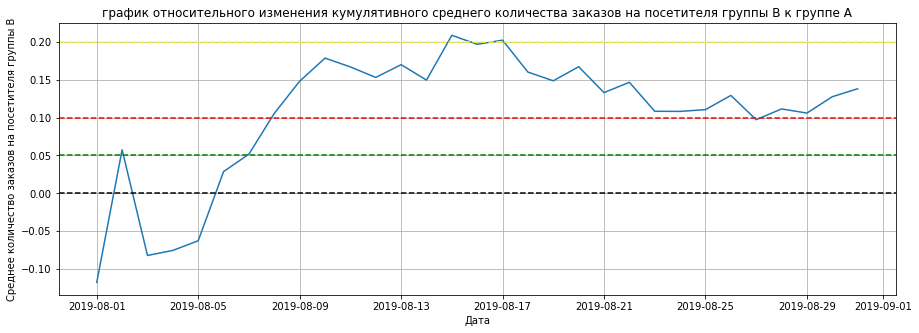

In [20]:
mergedCumulativeConversions = cumulativeDataA[['date', 'conversion']].merge(cumulativeDataB[['date', 'conversion']],
                                              left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15, 5))
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label='Относительный прирост конверсии группы B относительно группы A')
plt.title('график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов на посетителя группы B')
plt.grid()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.05, color='green', linestyle='--')
plt.axhline(y=0.1, color='red', linestyle='--')
plt.axhline(y=0.2,color='yellow', linestyle='--')
plt.show()

**Выводы:**

До 6 августа группа B проигрывала группе А, затем начиная с 7 августа группа B резко выросла вверх до 0,21. Потом ее конверсия снова падала, но 27 зафиксировалась и постепенно растет. Значительный рост связан с наличием выбросов

### Построим точечный график количества заказов по пользователям

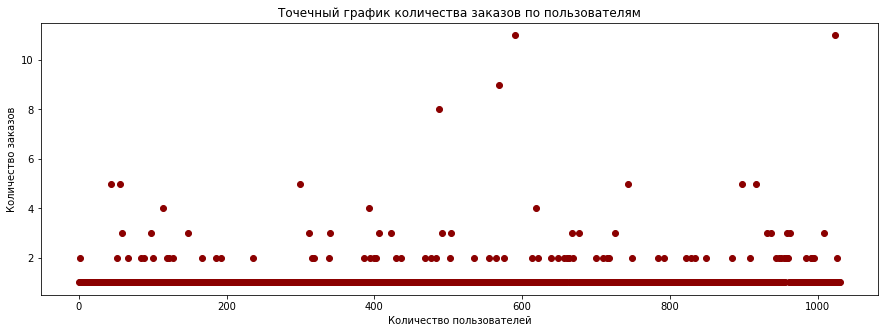

In [21]:
ordersByUsers=(orders.groupby('visitorid', as_index=False).agg({'transactionid': 'nunique'}))
ordersByUsers.columns=['userid', 'orders']
# серия из чисел от 0 до количества наблюдений в ordersByUsers
plt.figure(figsize=(15, 5))
x_values=pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'], color='darkred')
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')
plt.show()

Рассматривая полученные результаты можно с уверенностью сказать, что пользователи с 1-2 заказами однозначно не являются выбросами и должны учитываться при дальнейшем анализе. Пользователи с 3-5 заказами находятся пока под вопросом. 


**Определим 95-й и 99-й перцентили количества заказов на пользователя и подведем итоги**

In [22]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


**Выводы:** 
1. 95% пользователей сделали 1-2 заказа;
2. Все остальные заказы являются выбросами (аномалией).

### Построим точечный график стоимостей заказов

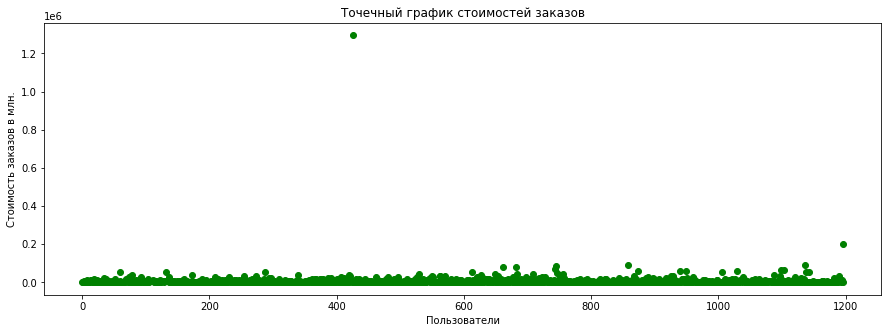

In [23]:
plt.figure(figsize=(15, 5))
x_values=pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'], color='green')
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов в млн.')
plt.show()

In [24]:
orders.sort_values(by='revenue', ascending=False).head()


,transactionid,visitorid,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B


Из представленных данных следует, что имеется ряд заказов, имеющих аномальную стоимость 1294500 рублей и 202740 рублей. 

Посмотрим на все аномалии.

**Определим 95-й и 99-й перцентили стоимости заказов**

In [25]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


In [26]:
order_max = (np.percentile(orders['revenue'], [95]))

In [27]:
#Посмотрим среднюю и медианную стоимость заказов
print('Медианная стоимость заказа:', orders['revenue'].median()) 
print('Средняя стоимость заказа:', orders['revenue'].mean()) 

Медианная стоимость заказа: 2978.0
Средняя стоимость заказа: 8348.005847953216


**Вывод:** 
1. Не более чем у 5% заказов стоимость более 28 000 рублей;
2. У 1% пользователей стоимость заказов больше 58233.2 рублей;
3. Выделяется один заказ на сумму 1 294 500 рублей.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Для начала соберем все данные по заказам и посетителям

In [28]:

#Соберем посетителей группы А
visitorsADaily = visitors[visitors['group']== 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACumulative = visitorsADaily.apply(
        lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        { 'date': 'max', 'visitorsPerDateA': 'sum'}
        ),
    axis = 1, 
)
visitorsACumulative.columns = ['date', 'visitorsCumulateveA']

#Соберем посетителей группы B
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCumulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCumulative.columns = ['date', 'visitorsCumulativeB']

#Соберем заказы группы A
ordersADaily = orders[orders['group']=='A'][['date', 'transactionid', 'visitorid', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionid' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACumulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACumulative.columns = ['date', 'ordersCumulativeA', 'revenueCumulativeA']
#Соберем заказы группы B
ordersBDaily = orders[orders['group']=='B'][['date', 'transactionid', 'visitorid', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionid' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCumulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCumulative.columns = ['date', 'ordersCumulativeB', 'revenueCumulativeB']


**Объединим все данные в одну таблицу**

In [29]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACumulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCumulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACumulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCumulative, left_on='date', right_on='date', how='left')
)

print(data.head(5)) 

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01  24              148579           21               
1 2019-08-02  20              93822            24               
2 2019-08-03  24              112473           16               
3 2019-08-04  16              70825            17               
4 2019-08-05  25              124218           23               

   revenuePerDateB  ordersCumulativeA  revenueCumulativeA  ordersCumulativeB  \
0  101217           24                 148579              21                  
1  165531           44                 242401              45                  
2  114248           68                 354874              61                  
3  108571           84                 425699              78                  
4  92428            109                549917              101                 

   revenueCumulativeB  visitorsPerDateA  visitorsPerDateB  \
0  101217              719               713                
1  266

**Посчитаем статистическую значимость различия в среднем количестве заказов между группами**

In [30]:
#Пользователи группы А,  которые сделали 1 или более заказов 
ordersByUsersA = ( 
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'})
)
ordersByUsersA.columns = ['usersid', 'orders']

#Пользователи группы B,  которые сделали 1 или более заказов 
ordersByUsersB = ( 
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'})
)
ordersByUsersB.columns = ['usersid', 'orders']


**Подготовим выборки к проверке критерием Манна-Уитни**

In [31]:
#Объявим переменный из обеих группы, где пользователи будут соответствовать количеству заказов.
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum()- len(ordersByUsersA['orders'])),
                                                       name='orders')], axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum()- len(ordersByUsersB['orders'])),
                                                       name='orders')], axis=0)

**Применим критерий Манна-Уитни и отформатируем p-value, округлив его до трех знаков после запятой**

Сформируем нулевую и альтернативную гипотезу:

**H_0:** Статистических различий в среднем заказе между группой А и группой B нет. 

**H_1:** Статистические различия в срезнем заказе между группой А и группой В есть. 

In [32]:
print('alpha:', 0.05)
print('p_value:', "{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительное различие в среднем между группами:', "{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

alpha: 0.05
p_value: 0.017
Относительное различие в среднем между группами: 0.138


**Выводы:**
1. P-value < alpha, потому нулевую гипотезу отвергаем. 
2. Относительный прирост среднего группы B к конверсии группы А равен 14%.
3. В среднем количестве заказов между группами есть статистически значимые различия.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Сформируем нулевую и альтернативную гипотезу:

**H_0**: Статистических различий в среднем чеке заказов между группой А и группой B нет.

**H_1**: Статистические различия в среднем чеке заказов между группой А и группой В есть.

In [33]:
print('alpha:', 0.05)

#Выведем p-value для сравнения средних чеков между группами. Округлим p-value до трёх знаков после запятой
print('p_value:', '{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

#Выведем относительный прирост среднего чека группы B, округлив до трёх знаков после запятой.
print('Относительный прирост среднего чека группы B','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean() - 1))

alpha: 0.05
p_value: 0.729
Относительный прирост среднего чека группы B 0.259


**Выводы:** 
1. p_value > alpha - статистически значимых отличий в среднем чеке между группами нет. 
2. Относительное различие между группами составляет около 26%, скорее всего это связано с выбросами. 

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

В пункте 3.7 посчитано, что 95-й и 99-й перцентили числа заказов на одного пользователя равны 2 и 4 заказам на пользователя. Примим за аномальных пользователей тех, кто совершил 3 заказ и более. 

In [34]:
#Очистим данные по заказам
usersWithManyOrders = pd.concat(
       [
           ordersByUsersA[ordersByUsersA['orders'] > 2]['usersid'],
           ordersByUsersB[ordersByUsersB['orders'] > 2]['usersid'],    
       ],
       axis = 0,
)

В пункте 3.8 посчитано, что 95-й и 99-й перцентили средних чеков равны 28 000 и 58233.2 рубля соответственно. Исключим средние чеки свыше 28000, как аномалии.

In [35]:
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorid']

Посчитаем количество аномалий 

In [36]:
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print('Количество аномалий:', abnormalUsers.shape[0])

Количество аномалий: 74


**Узнаем как аномалии повлияли на результаты теста**

Сформируем нулевую и альтернативную гипотезы: 

**H_0**: Статистической значимости различий в среднем количестве заказов на посетителя между группой А и группой B нет. 

**H_1**: Стастистическая значимость различий в среднем количестве заказов на посетителя между группой А и группой В есть. 

In [37]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['usersid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
        0,
        index=np.arange(
            data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
        ),
        name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['usersid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
        0,
        index=np.arange(
            data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
        ),
        name='orders',
        ),
    ],
    axis=0,
)
#Применим критерий Манна-Уитни и отформатируем p-value, округлив его до трех знаков после запятой
print('p_value:','{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
#выведем относительное различие в среднем между группами. Округлим до 3 знаков после запятой
print('Относительное различие между группами', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p_value: 0.013
Относительное различие между группами 0.173


**Выводы:** 
1. Относительной разницы в показателях между "сырыми данными" и "очищенными" незамечено.
2. Как и в случае с сырыми данными, статистическая значимость достигнута. 
3. Группа B значительно лучше группы А

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

Сформируем нулевую и альтернативную гипотезу:

**H_0**: Статистических различий в среднем чеке заказов между группой А и группой B нет.

**H_1**: Статистические различия в среднем чеке заказов между группой А и группой В есть.

Выведем p-value для сравнения средних чеков между очищенными группами. Округлим p-value до трёх знаков после запятой, а также выведем относительный прирост среднего чека очищенной группы B, округлив до трёх знаков после запятой.

In [38]:
print('p_value: '
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительный прирост среднего чека очищенной группы B: '
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p_value: 0.738
Относительный прирост среднего чека очищенной группы B: -0.020


**Выводы:**
1. p_value больше 5%, а значит нельзя утверждать, что в среднем чеке есть различия. 
2. Относительный прирост среднего чека B ниже на 2%, чем у среднего чека A, хотя в "сырых данных" данный показатель преобрадал у группы B на 28%.

### Решение по результатам теста

По результатам проведенного теста стоит подвести следующие итоги:
1. Есть статистически значимое различие по конверсии между группами `A` и `B`, как по "сырым", так и по "очищенным" данным. Группа `B` преобладает:. 
- по `сырым` данным - на `14%`
- по `очищенным` данным - на `16%`
2. По "сырым" и по "очищенным" данным нет статистически значимого различия по среднему чеку между группами. Однако, по "сырым" данным относительный прирост среднего чека группы B превышает на 26% показатели группы А, в то время, как по данным после фильтрации относительный прирост среднего чека группы B меньше, чем у группы А на 2%

**`Решение`: Остановить тест, зафиксировать победу групп B, поскольку конверсия значительно преобладает над группой А, в то время, как средний счет приблизительно одинаковый.**

## Общий вывод

В рамках данной работы были рассмотрены данные интернет-магазина, рассмотрены основные гипотезы направленные на увеличение выручки, а также проведено исследования A/B-теста.

На первом этапе работы (приоритезация гипотез) был проанализирован датафрейм - `/datasets/hypothesis.csv`. 
В рамках анализа были применены методы `ICE` и `RICE` с целью определения приоритетных гипотез, которые смогу увеличить выручку. 

Согласно методу `ICE` наиболее приоритетным гипотезами являются: 
1. `Запустить акцию, дающую скидку на товар в день рождения`
2. `Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей`
3. `Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок`

Согласно методу `RICE` наиболее приоритетным гипотезами являются: 
1. `Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок`
2. `Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа`
3. `Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей`

После чего было выявлено, что гипотеза `Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок` является наиболее привлекательной для попытки внедрения, поскольку имеет наибольший охват и нормальное количество трудозатрат. 

На втором этапе исследования был проведен анализ A/B-теста по внедрению новых форм подписок на все основные страницы, чтобы собрать базу новых клиентов для email-рассылки. Тестирование длилось с `1 августа 2019` по `31 августа 2019 года`. 

В рамках тестирования группа А наблюдала сайт без внедрегия форм подписок на все основные страницы, в то время, как группа B наблюдала сайт после изменений. 

По результатам A/B-теста были выделены следующие закономерности: 
1. `Выручка группы B лидирует` на протяжении всего тестирования; 
2. Практически на протяжении всего времени A/B-теста `средний чек у группы B больше чем у группы А`, исключением является отрезок времени с 11 по 15 августа; 
3. Начиная с 6 августа `среднее количество заказов у группы B выше`, чем у группы А;
4. `95%` пользователей A/B-теста сделали `1-2 заказа`;
5. `Стоимость заказов` 95% пользователей не превышает `28 000 рублей`;
6. Средняя стоимость заказа - `8348 рублей`, медианая - `2978 рублей`;
7. Есть статистически значимое различие по `конверсии` между группами A и B, как по "сырым", так и по "очищенным" данным. `Группа B преобладает`:
- по сырым данным - на 14%
- по очищенным данным - на 16%
8. По "сырым" и по "очищенным" данным нет статистически значимого различия по среднему чеку между группами. 
9. По "сырым" данным относительный прирост среднего чека группы B превышает на 26% показатели группы А, в то время, как по данным после фильтрации относительный прирост среднего чека группы B меньше, чем у группы А на 2%

**По результатам проведенного A/B-теста принято решение его остановить в связи с наличием значительного преимущества группы B по выручке и конверсии.**